In [1]:

"""
    > Saving the Model (CNN - Image Classification)
    > Loading the Mode to ReUse it for Predictions
    > Using the Model (CNN - Image Classification) with Flask
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print(">> IMAGE CLASSIFICATION MODEL CREATION")

print()

print(">> STEP#1 IMAGE PRE-PROCESSING")
train_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

training_images = train_image_generator.flow_from_directory(
                                        'covid19dataset/train',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')

testing_images = test_image_generator.flow_from_directory(
                                        'covid19dataset/test',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(training_images)
# plotImages(sample_training_images[:5])



>> IMAGE CLASSIFICATION MODEL CREATION

>> STEP#1 IMAGE PRE-PROCESSING
Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [2]:
print(">> STEP#2 CREATE CNN MODEL")
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Further Adding the NeuralNet in ConvNet Model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

>> STEP#2 CREATE CNN MODEL


In [3]:
print(">> STEP#3 TRAIN THE MODEL")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# use fit_generator instead of fit  -> if we have used ImageDataGenerator for our Image Data Set Creation
history = model.fit_generator(training_images, epochs=5, validation_data=testing_images)


>> STEP#3 TRAIN THE MODEL


C:\Users\Gudla Prathyusha\AppData\Local\Temp\ipykernel_25524\945677713.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_images, epochs=5, validation_data=testing_images)


Epoch 1/5
17/17 [==============================] - 14s 715ms/step - loss: 0.6008 - accuracy: 0.7538 - val_loss: 0.3726 - val_accuracy: 1.0000
Epoch 2/5
17/17 [==============================] - 6s 358ms/step - loss: 0.1989 - accuracy: 0.9615 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 3/5
17/17 [==============================] - 6s 339ms/step - loss: 0.0788 - accuracy: 0.9769 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4/5
17/17 [==============================] - 5s 281ms/step - loss: 0.1422 - accuracy: 0.9615 - val_loss: 0.4884 - val_accuracy: 0.7222
Epoch 5/5
17/17 [==============================] - 5s 284ms/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 0.0176 - val_accuracy: 1.0000


>> STEP#4 VISUALIZING ACCURACY AND LOSS


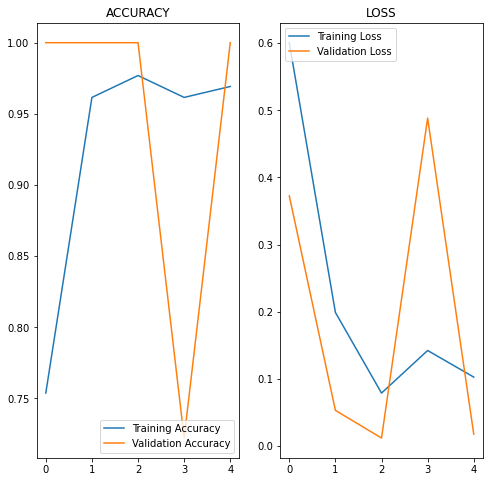

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


'\nPS: pip install h5py\nRef: https://www.h5py.org/\n     https://www.hdfgroup.org/\n     \n     h5 format shall save the model weights\n     typically h5 format is to save tensors\n'

In [4]:

print(">> STEP#4 VISUALIZING ACCURACY AND LOSS")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.show()

# Simply use the save function to save the model :)
#model.save("model.h5")  # h5 format was a bit previous model for previous versions of kera
model.save("model")       # the latest approach : model is a folder in which model will be saved anc can be any name of your choice
# print(">> MODEL SAVED :)")

"""
PS: pip install h5py
Ref: https://www.h5py.org/
     https://www.hdfgroup.org/
     
     h5 format shall save the model weights
     typically h5 format is to save tensors
"""

In [7]:
pip install opencv-python

In [5]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# We need not to create and train the model again
# No need to train the model, its a pre defined trained model
model = load_model("model.h5")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Testing the Normal Image
image = cv2.imread("covid19dataset/test/normal/NORMAL2-IM-1385-0001.jpeg")    # 1
# image = cv2.imread("covid19dataset/test/covid/nejmoa2001191_f3-PA.jpeg")    # 0
image = cv2.resize(image, (64, 64))
image = np.reshape(image, [1, 64, 64, 3])
classes = (model.predict(image) > 0.5).astype("int32")
#predict = np.argmax(model.predict(image))

#predicitons = model.predict_classes(image)
label = ["COVID-19 INFECTED", "NORMAL"]
print(classes)
print(label[classes[0][0]])

"""
    Upon Finishing the Training we have Loss and Accuracy 
    So, after loading the model validate if it has the same Loss and Accuracy as we trained in for
    
    Try loading the model only and not h5 format
    
"""

1/1 [==============================] - 0s 377ms/step
[[1]]
NORMAL


'\n    Upon Finishing the Training we have Loss and Accuracy \n    So, after loading the model validate if it has the same Loss and Accuracy as we trained in for\n    \n    Try loading the model only and not h5 format\n    \n'

In [9]:
"""
    Putting Up Image Classification from the Saved Model
    Alongwith Flask App
"""

from flask import *

from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Creating a Python App running on Flask Server
app = Flask(__name__)

def predictCOVID(imageToBeTested):

    model = load_model("model.h5")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    image = cv2.imread(imageToBeTested)
    image = cv2.resize(image, (64, 64))
    image = np.reshape(image, [1, 64, 64, 3])

    #classes = model.predict_classes(image)  # [[0]]
    classes = (model.predict(image) > 0.5).astype("int32")

    label = ["COVID-19 INFECTED", "NORMAL"]

    return label[classes[0][0]]


@app.route('/')
def index():
    return render_template("image-classification-index.html")

@app.route('/upload-image', methods=['POST'])
def uploadImage():
    if request.method == 'POST': # Just to Validate if user is uploading the file in POST Request
        file = request.files['image']
        file.save(file.filename)

        label = predictCOVID(file.filename)

        return render_template('image-classification-result.html', name=label)


if __name__ == '__main__':
    # app.run() # execute the app i.e. let the app run on Flask Server
    app.run(debug=True)     # Enable Debugging for the error

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Gudla Prathyusha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
